C:\Users\adabs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


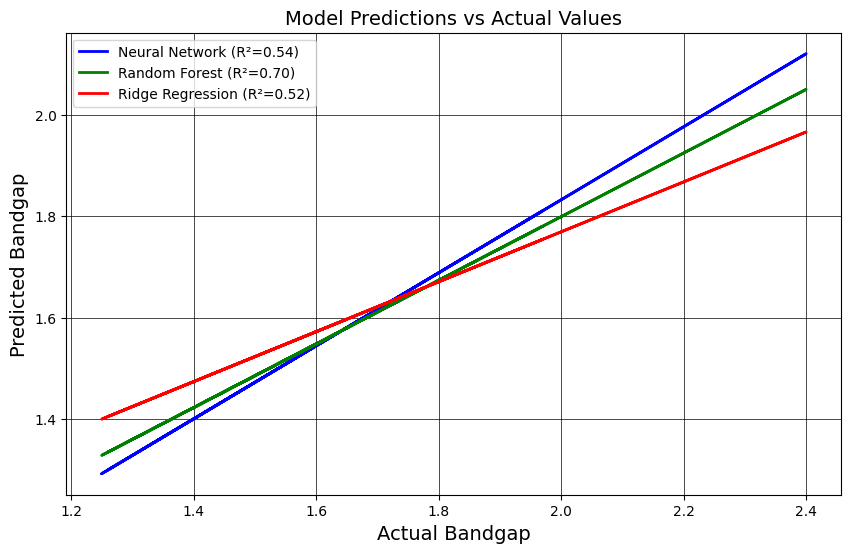

Neural Network - Test Loss (MSE): 0.07609018683433533
Neural Network - Test MAE: 0.1653546392917633
Neural Network - R-squared: 0.5438194704830123
Random Forest - Mean Squared Error (MSE): 0.049586858849368864
Random Forest - R-squared (R2): 0.7027138887355052
Ridge Regression - Mean Squared Error (MSE): 0.0803949778622236
Ridge Regression - R-squared (R2): 0.5180112052175332


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge


data = pd.read_csv('Tin_data.csv')

 
X = data.drop(columns=['Bandgap'])
y = data['Bandgap']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=0)

predictions_nn = model.predict(X_test_scaled)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
predictions_rf = rf_model.predict(X_test_scaled)


ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
predictions_ridge = ridge_model.predict(X_test_scaled)


y_test_flat = np.array(y_test).flatten()
predictions_nn_flat = predictions_nn.flatten()
predictions_rf_flat = predictions_rf.flatten()
predictions_ridge_flat = predictions_ridge.flatten()


plt.figure(figsize=(10, 6))


z_nn = np.polyfit(y_test_flat, predictions_nn_flat, 1)
p_nn = np.poly1d(z_nn)
plt.plot(y_test_flat, p_nn(y_test_flat), color='blue', label=f'Neural Network (R²={r2_score(y_test_flat, predictions_nn_flat):.2f})', linewidth=2)


z_rf = np.polyfit(y_test_flat, predictions_rf_flat, 1)
p_rf = np.poly1d(z_rf)
plt.plot(y_test_flat, p_rf(y_test_flat), color='green', label=f'Random Forest (R²={r2_score(y_test_flat, predictions_rf_flat):.2f})', linewidth=2)

z_ridge = np.polyfit(y_test_flat, predictions_ridge_flat, 1)
p_ridge = np.poly1d(z_ridge)
plt.plot(y_test_flat, p_ridge(y_test_flat), color='red', label=f'Ridge Regression (R²={r2_score(y_test_flat, predictions_ridge_flat):.2f})', linewidth=2)


plt.xlabel('Actual Bandgap', fontsize=14)
plt.ylabel('Predicted Bandgap', fontsize=14)
plt.title('Model Predictions vs Actual Values', fontsize=14)

plt.legend()
plt.grid(True, which='both', color='black', linestyle='-', linewidth=0.5)
plt.savefig('model_comparisons_tin.tiff', format='tiff', dpi=300)

plt.show()

test_loss_nn, test_mae_nn = model.evaluate(X_test_scaled, y_test, verbose=0)
r2_nn = r2_score(y_test, predictions_nn)
print("Neural Network - Test Loss (MSE):", test_loss_nn)
print("Neural Network - Test MAE:", test_mae_nn)
print("Neural Network - R-squared:", r2_nn)


mse_rf = mean_squared_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - R-squared (R2): {r2_rf}")


mse_ridge = mean_squared_error(y_test, predictions_ridge)
r2_ridge = r2_score(y_test, predictions_ridge)
print(f"Ridge Regression - Mean Squared Error (MSE): {mse_ridge}")
print(f"Ridge Regression - R-squared (R2): {r2_ridge}")
